# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE


<table>
  <tr><td>
    <img src="https://drive.google.com/uc?id=1yJKgmHrRFnBk987HJfeDrMcTEXtk0z7W"
         alt="Fashion MNIST sprite"  width="1000">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1. Employee Retention Prediction
  </td></tr>
</table>


![alt text](https://drive.google.com/uc?id=10NJUOTWOBzp2MNkgcPpCF0fLtdoN_jKj)

![alt text](https://drive.google.com/uc?id=1evbDHoW2t0emxkbQd8yevYFZ5woJKRPY)

![alt text](https://drive.google.com/uc?id=1Mk2H7VYfv6ijUS9XqEdBQV6_LaHiyvkJ)

# TASK #2: IMPORT LIBRARIES AND DATASETS

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\vikasbhadoria\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# You have to include the full link to the csv file containing your dataset
dataset = pd.read_csv('Human_resource_data.csv')
dataset.sample(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1000,52,No,Travel_Rarely,258,Research & Development,8,4,Other,1,1409,...,3,80,0,12,2,1,5,4,0,4
272,28,No,Travel_Rarely,1158,Research & Development,9,3,Medical,1,377,...,4,80,1,5,3,2,5,2,0,4
883,33,No,Travel_Rarely,117,Research & Development,9,3,Medical,1,1238,...,2,80,1,15,5,3,14,10,4,10
1042,44,No,Non-Travel,981,Research & Development,5,3,Life Sciences,1,1471,...,4,80,0,7,5,3,5,2,0,3
1247,31,No,Travel_Rarely,1003,Sales,5,3,Technical Degree,1,1749,...,3,80,1,6,3,3,5,2,0,2


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### We also now know which features are catogerical.

In [5]:
dataset.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### .describe() gives us a lot of information. For example now I know the average age group of employess in this company which is around 37.

# TASK #3: VISUALIZE DATASET

In [6]:
# Let's replace 'Attrition' , 'overtime' , 'Over18' column with integers before performing any visualizations 
dataset['Attrition'] = dataset['Attrition'].apply(lambda x:1 if x == 'Yes' else 0)
dataset['OverTime'] = dataset['OverTime'].apply(lambda x:1 if x == 'Yes' else 0)
dataset['Over18'] = dataset['Over18'].apply(lambda x:1 if x == 'Y' else 0)
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


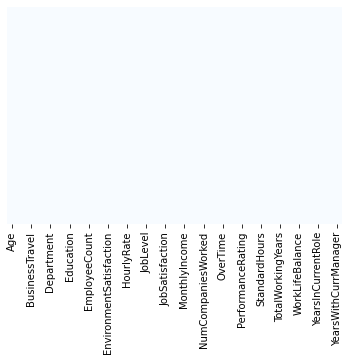

In [7]:
# Let's see if we have any missing data.
sns.heatmap(dataset.isnull(),cmap = 'Blues', cbar = False, yticklabels = False)

### Luckily we do not have any missing values. :)

### Now lets plot a histogram of all the features together and analyse some important features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000287C1E78E80>,
      dtype=object)

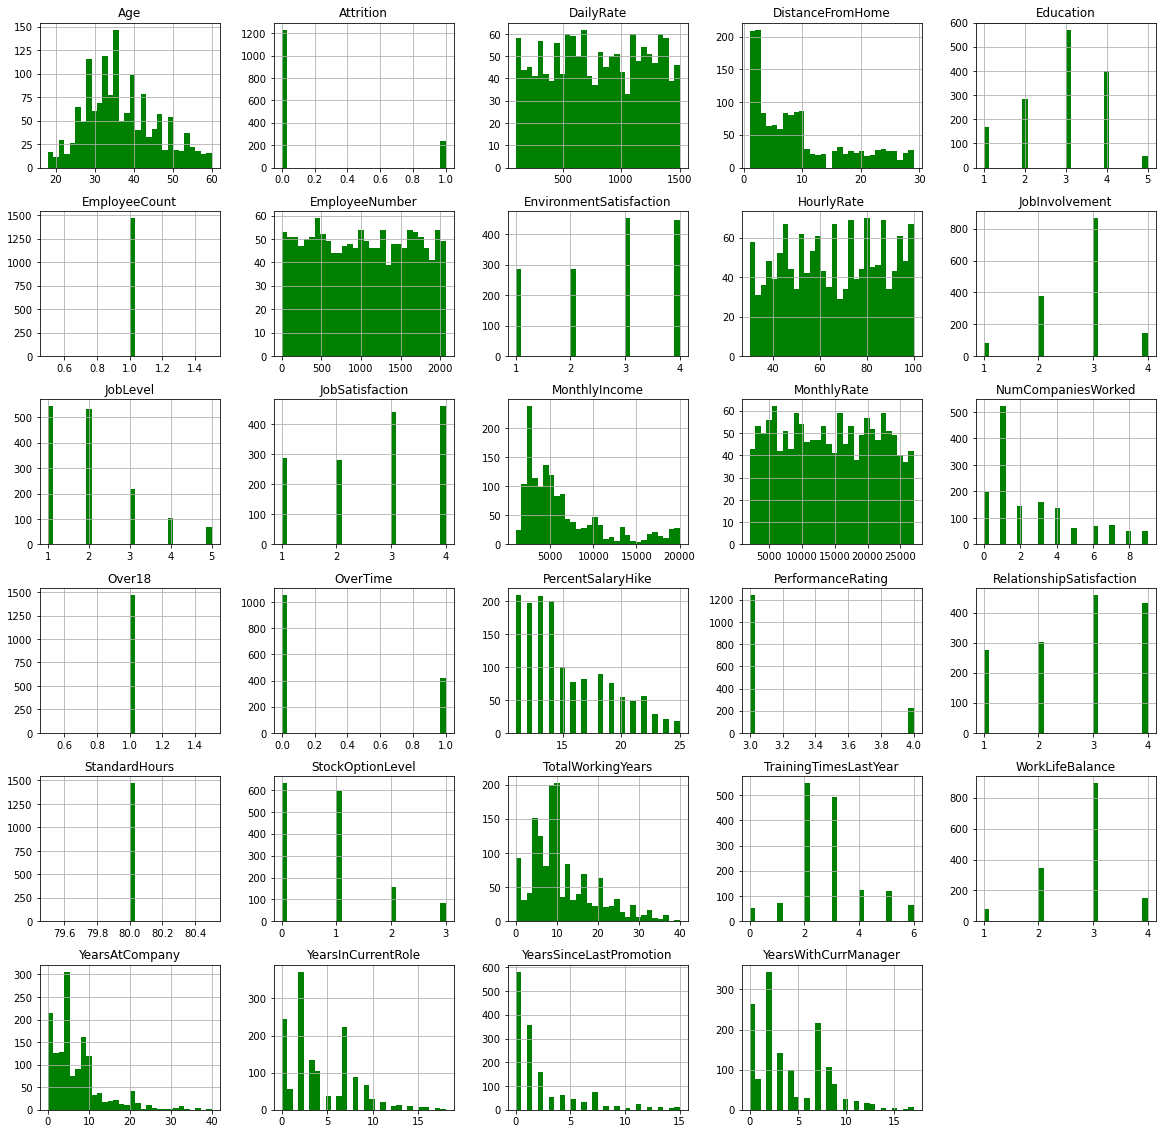

In [8]:
dataset.hist(bins=30,figsize=(20,20),color='g')

### We get really good analyses for some important features such as Age, percentagehike, totalworkingyears, Monthlyincome, attrition. All this by a simple .hist command

In [9]:
# Several features such as 'MonthlyIncome' and 'TotalWorkingYears' are tail heavy
# It makes sense to drop 'EmployeeCount' and 'Standardhours' since they do not change from one employee to the other

In [10]:
# It makes sense to drop 'EmployeeCount' , 'Standardhours' and 'Over18' since they do not change from one employee to the other
# Let's drop 'EmployeeNumber' as well
# use inplace = True to change the values in memory.

dataset.drop(['EmployeeCount','StandardHours','Over18','EmployeeNumber'],axis = 1, inplace = True)

In [11]:
# Let's see how many employees left the company! 
left_df = dataset[dataset['Attrition'] == 1]
stayed_df = dataset[dataset['Attrition'] == 0]

In [12]:
print('1. Total = {} '.format(len(dataset)))
print('2. Number of employees left the company = {}'.format(len(left_df)))
print('3. Percentage of employees left the company = {}'.format((len(left_df)/len(dataset))*100))
print('4. Number of employees who stayed in the company = {}'.format(len(stayed_df)))
print('5. Percentage of employees stayed the company = {}'.format((len(stayed_df)/len(dataset))*100))

1. Total = 1470 
2. Number of employees left the company = 237
3. Percentage of employees left the company = 16.122448979591837
4. Number of employees who stayed in the company = 1233
5. Percentage of employees stayed the company = 83.87755102040816


#Count the number of employees who stayed and left
#It seems that we are dealing with an imbalanced dataset 


In [13]:
left_df.describe()

#  Let's compare the mean and std of the employees who stayed and left 
# 'age': mean age of the employees who stayed is higher compared to who left
# 'DailyRate': Rate of employees who stayed is higher
# 'DistanceFromHome': Employees who stayed live closer to home 
# 'EnvironmentSatisfaction' & 'JobSatisfaction': Employees who stayed are generally more satisifed with their jobs
# 'StockOptionLevel': Employees who stayed tend to have higher stock option level

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,...,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,...,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,...,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,...,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [14]:
stayed_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,...,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,...,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


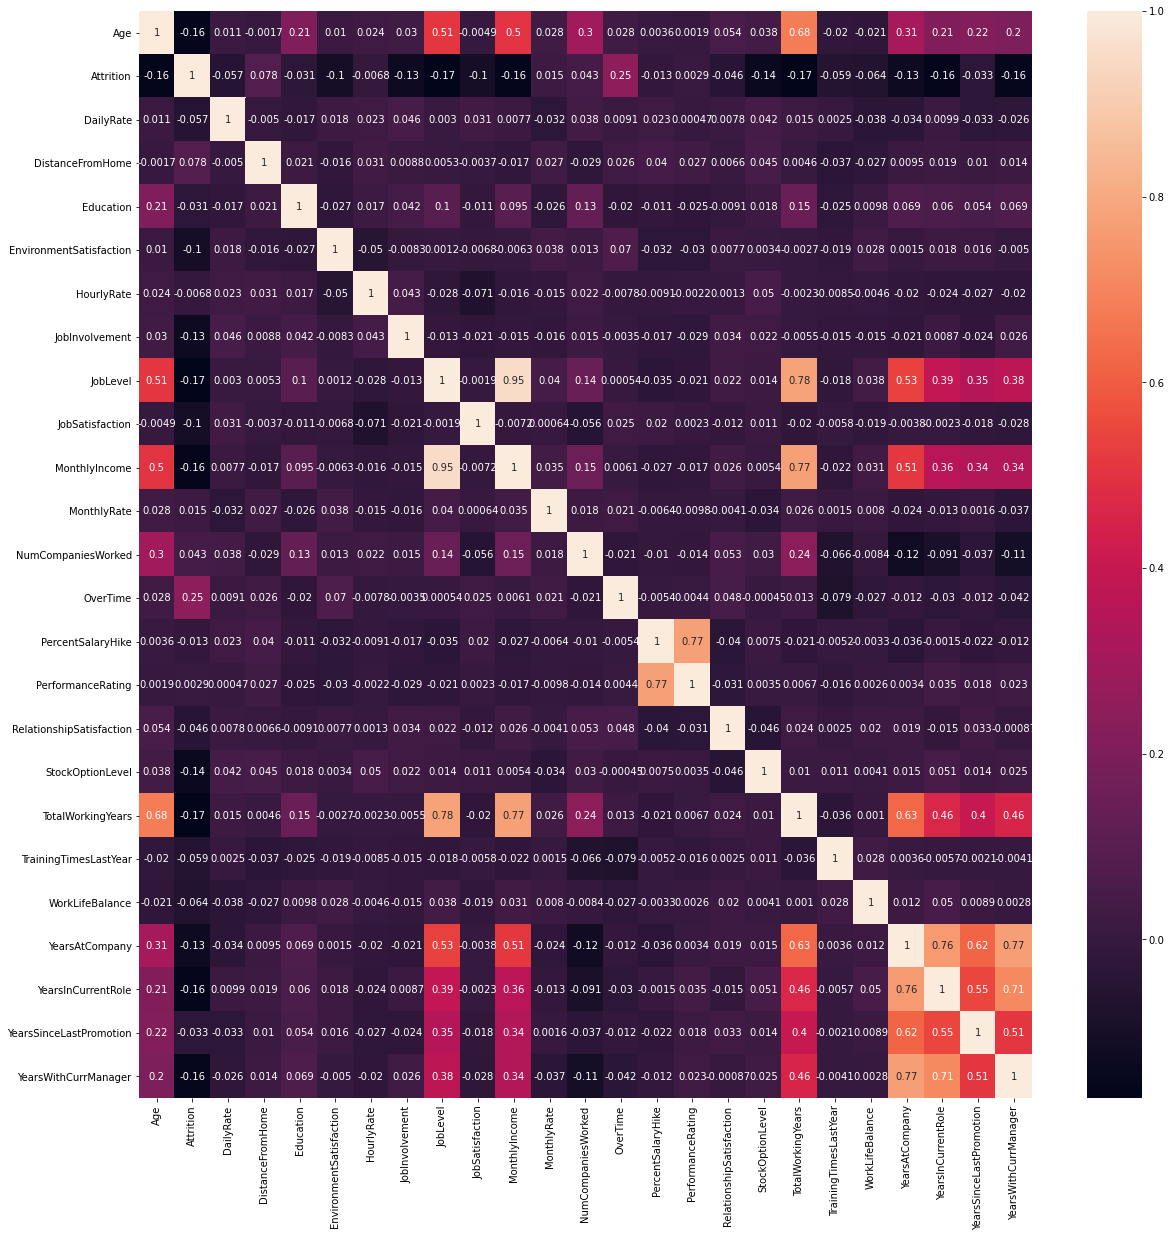

In [15]:
correlations = dataset.corr()
f,ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot=True)

#### Job level is strongly correlated with total working years
#### Monthly income is strongly correlated with Job level
#### Monthly income is strongly correlated with total working hours
#### Age is stongly correlated with monthly income
#### Also we can see that overtime has a strong affect on Attrition


### Now lets see what age group tent to leave the company more.

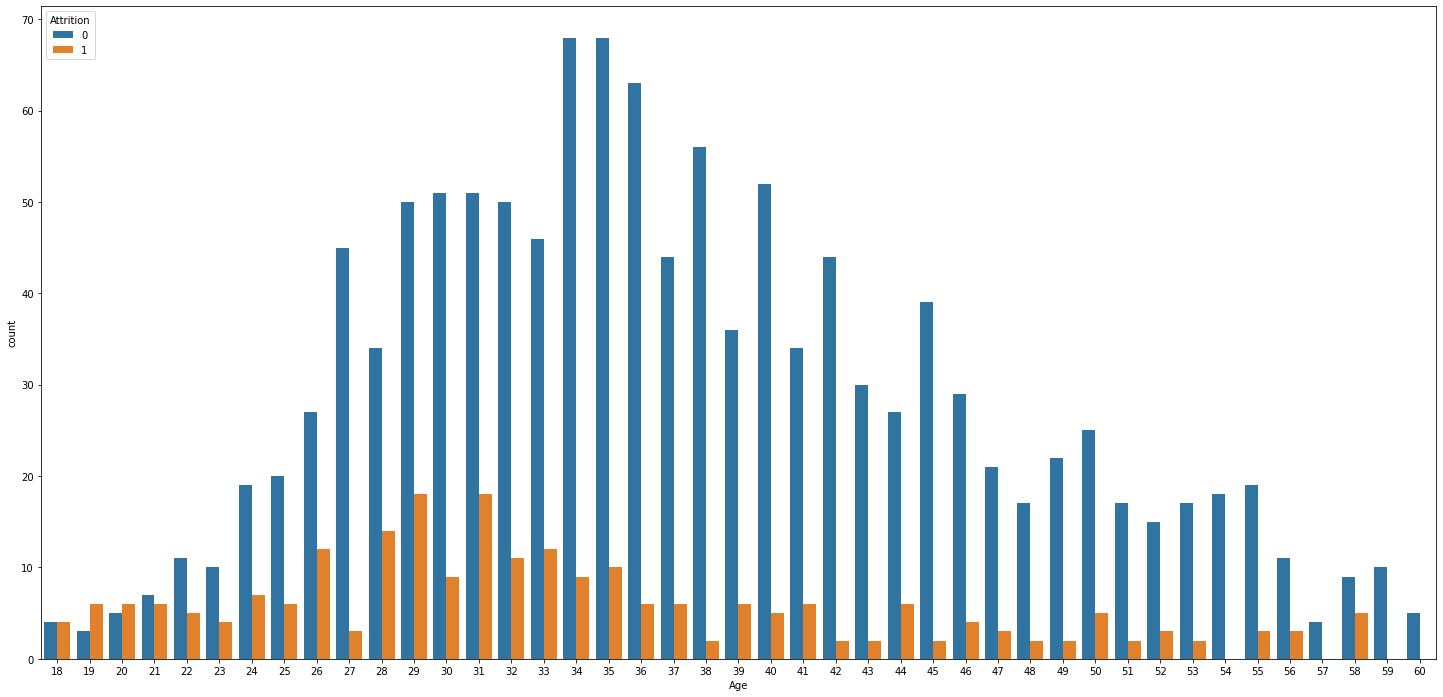

In [16]:
plt.figure(figsize=(25,12))
sns.countplot(x = 'Age', hue = 'Attrition', data = dataset)

#### We can see that the age group between 28 to 31 have left the most

### Lets explore more

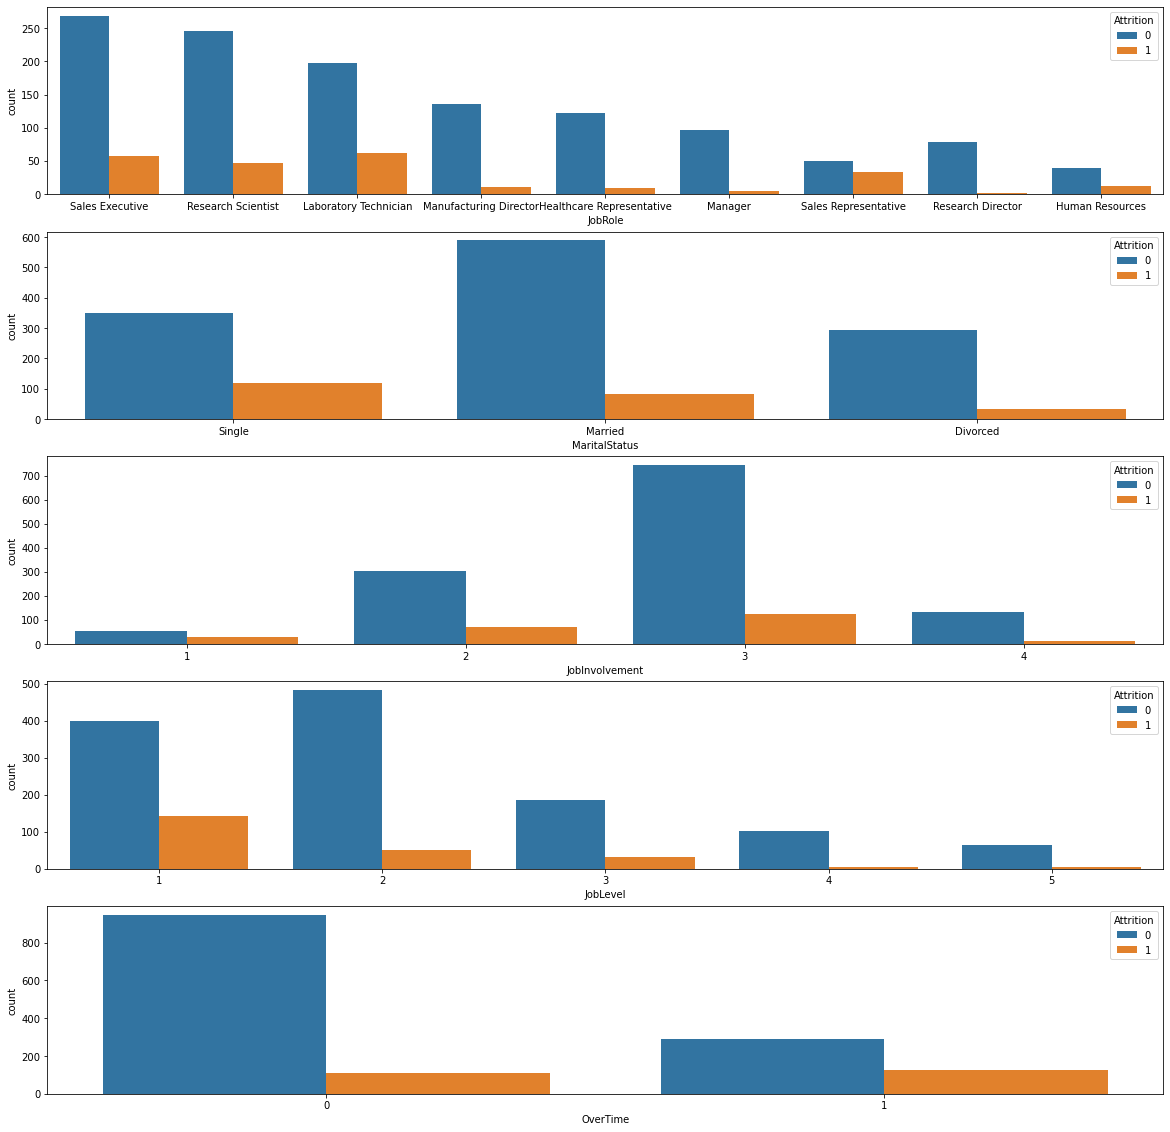

In [17]:
plt.figure(figsize=(20,20))
plt.subplot(511)
sns.countplot(x = 'JobRole',hue = 'Attrition', data=dataset)
plt.subplot(512)
sns.countplot(x = 'MaritalStatus',hue = 'Attrition', data=dataset)
plt.subplot(513)
sns.countplot(x = 'JobInvolvement',hue = 'Attrition', data=dataset)
plt.subplot(514)
sns.countplot(x = 'JobLevel',hue = 'Attrition', data=dataset)
plt.subplot(515)
sns.countplot(x = 'OverTime',hue = 'Attrition', data=dataset)

#### Sales Representitives tend to leave compared to any other job 
#### Single employees tend to leave compared to married and divorced
#### Less involved employees tend to leave the company 
#### Less experienced (low job level) tend to leave the company 

### Lets do some more visualizations, but now for continuous values

Text(0.5, 0, 'Distance from home')

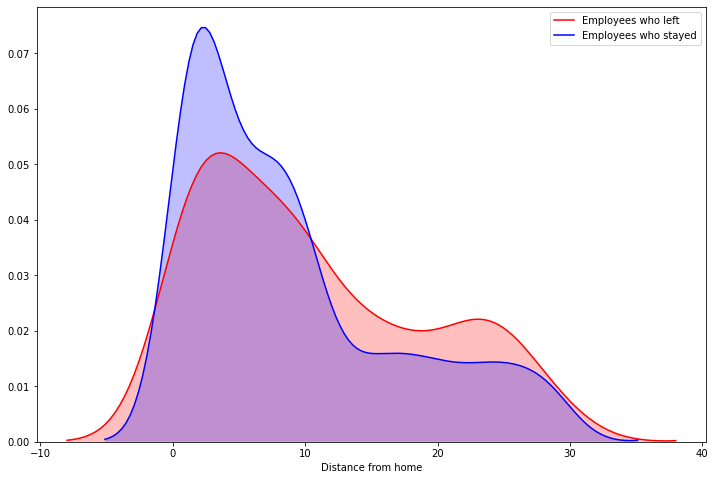

In [18]:
plt.figure(figsize = (12,8))
sns.kdeplot(left_df['DistanceFromHome'], label = 'Employees who left', color = 'r', shade = True)
sns.kdeplot(stayed_df['DistanceFromHome'],label='Employees who stayed',color = 'b',shade=True)
plt.xlabel('Distance from home')

### As we can see, as the distance increases the employees tend to leave more as compared to who stayed.

Text(0.5, 1.0, 'Number of years with the current manager v/s Atrition')

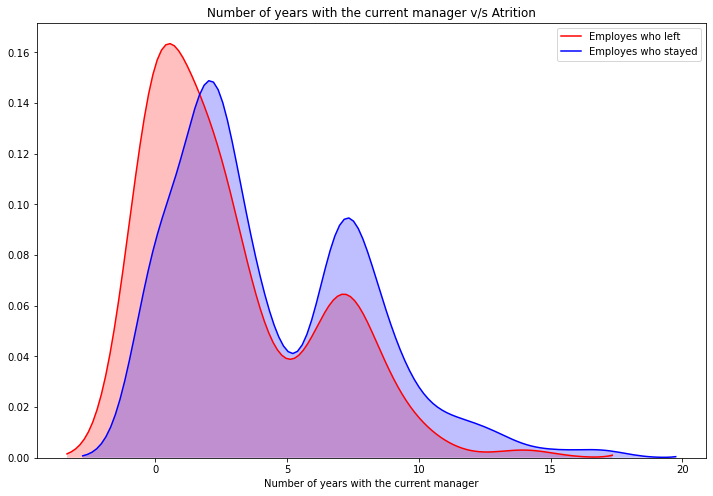

In [19]:
plt.figure(figsize=(12,8))
sns.kdeplot(left_df['YearsWithCurrManager'],shade=True,color='r',label='Employes who left')
sns.kdeplot(stayed_df['YearsWithCurrManager'],shade=True,color='b',label='Employes who stayed')

plt.xlabel('Number of years with the current manager')
plt.title('Number of years with the current manager v/s Atrition')

#### As seen that in early time with the manager, emloyees tend to leave more than staying but with time passing by the employees tend to stay.

Text(0.5, 1.0, 'Number of total working years v/s Attrition')

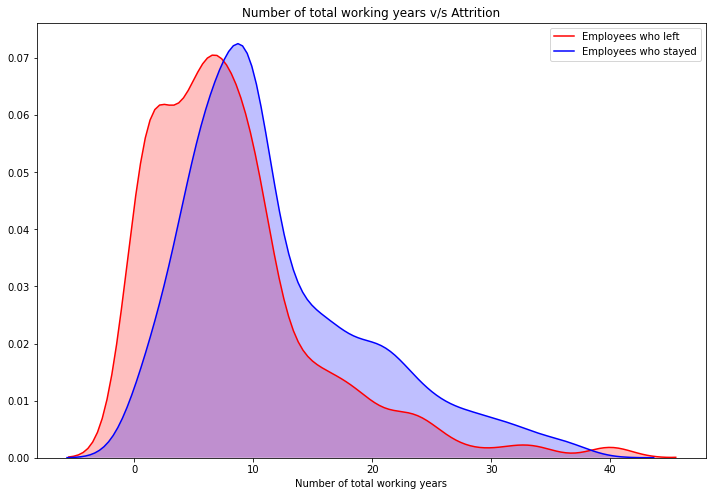

In [20]:
plt.figure(figsize=(12,8))
sns.kdeplot(left_df['TotalWorkingYears'],label='Employees who left',shade = True, color = 'r')
sns.kdeplot(stayed_df['TotalWorkingYears'],label='Employees who stayed',shade = True, color = 'b')

plt.xlabel('Number of total working years')
plt.title('Number of total working years v/s Attrition')

#### Interesting to see the trend that a lot of employees leave between 7 to 10 years of working

### Lets create some boxplot for more visualizations

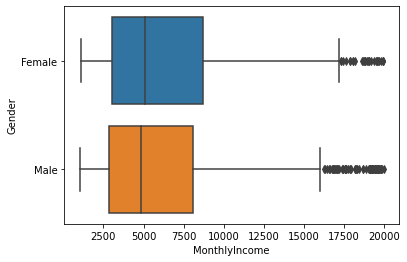

In [21]:
# Let's see the Gender vs. Monthly Income
sns.boxplot(x='MonthlyIncome',y='Gender',data=dataset)

### Nice to see the gender equality here. Infact female tend to get more salaries here.

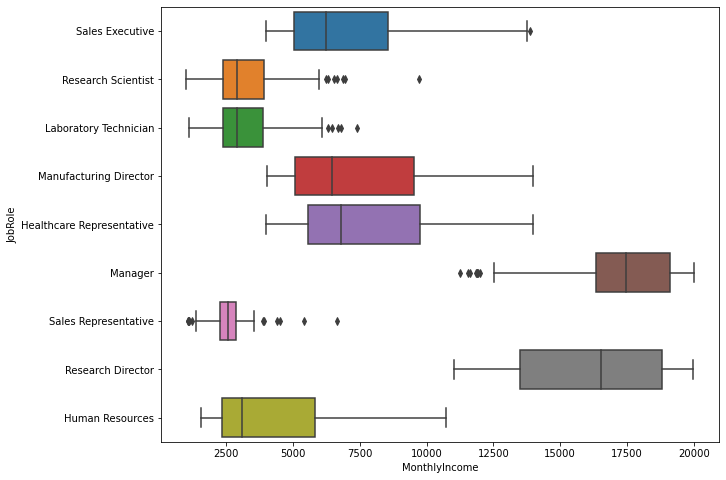

In [22]:
# Let's see the Jod role vs. Monthly Income
plt.figure(figsize=(10,8))
sns.boxplot(x='MonthlyIncome',y='JobRole',data=dataset)

#### No doubt why we saw sales representatives leaving the job a lot in my earlier visualizations.

# TASK #4: CREATE TESTING AND TRAINING DATASET & PERFORM DATA CLEANING

#### Handling the catogerical variables.
First we select them, then we transform them.

In [23]:
cat_var = [key for key in dict(dataset.dtypes)
             if dict(dataset.dtypes)[key] in ['object'] ] 
cat_var

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus']

In [24]:
X_cat = dataset[['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus']]
X_cat.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married


In [25]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X_cat = onehotencoder.fit_transform(X_cat).toarray()
X_cat

array([[0., 0., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [26]:
X_cat = pd.DataFrame(X_cat)
X_cat.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


#### Selecting all the numerical values

In [27]:
numeric_var = [key for key in dict(dataset.dtypes)
                   if dict(dataset.dtypes)[key]
                       in ['float64','float32','int32','int64']]
numeric_var

['Age',
 'Attrition',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [28]:
X_numerical = dataset[['Age','Attrition','DailyRate','DistanceFromHome','Education','EnvironmentSatisfaction','HourlyRate','JobInvolvement','JobLevel','JobSatisfaction','MonthlyIncome','MonthlyRate','NumCompaniesWorked','OverTime','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

In [29]:
X_all = pd.concat([X_cat,X_numerical],axis=1)
X_all.head()

,0,1,2,3,4,5,6,7,8,9,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,3,1,0,8,0,1,6,4,0,5
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,4,4,1,10,3,3,10,7,1,7
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3,2,0,7,3,3,0,0,0,0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,3,3,0,8,3,3,8,7,3,0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,4,1,6,3,3,2,2,2,2


In [30]:
# I will now drop the target variable 'Attrition'
X_all.drop('Attrition',axis=1,inplace=True)
X_all.shape

(1470, 50)

### Now I will be scaling down all the values so that we can feed it to our ML/DL models

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(X_all)
scaled_data

array([[0.        , 0.        , 1.        , ..., 0.22222222, 0.        ,
        0.29411765],
       [0.        , 1.        , 0.        , ..., 0.38888889, 0.06666667,
        0.41176471],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.11111111, 0.        ,
        0.17647059],
       [0.        , 1.        , 0.        , ..., 0.33333333, 0.        ,
        0.47058824],
       [0.        , 0.        , 1.        , ..., 0.16666667, 0.06666667,
        0.11764706]])

In [32]:
y = dataset['Attrition']
y.shape

(1470,)

# TASK #5: UNDERSTAND THE INTUITION BEHIND LOGISTIC REGRESSION CLASSIFIERS, ARTIFICIAL NEURAL NETWORKS, AND RANDOM FOREST CLASSIFIER

![alt text](https://drive.google.com/uc?id=19DpnhFkfsNEDPlH1dkfdr1zO36vRcBit)

![alt text](https://drive.google.com/uc?id=1J03xZf6OiYtGV3IgJBUURBWyScpvaAbU)

![alt text](https://drive.google.com/uc?id=1WNsznVn7je5r9HGnSLLdABICxrIv2Mrs)

![alt text](https://drive.google.com/uc?id=1bX5uGmy5vbYTlp7m4tw_V2kTNzAHpHLp)

![alt text](https://drive.google.com/uc?id=1ztrMNehNYWMw6NwhOOC9BDBdnoNirpqZ)

# TASK #6: UNDERSTAND HOW TO ASSESS CLASSIFICATION MODELS 

![alt text](https://drive.google.com/uc?id=1OZLbKm1AJSyvoBgfvlfcLIWZxLOvzOWq)

![alt text](https://drive.google.com/uc?id=11pNdVw4oWeNOWrkadrrxon7FU4qO5m6U)

![alt text](https://drive.google.com/uc?id=1Bk1xFW2tGBdwg-njOhw79MxtYBQnK-6x)

![alt text](https://drive.google.com/uc?id=19cXoBqSiqbEGNofnD603bz3xEAsX28hy)

# TASK #7: TRAIN AND EVALUATE A LOGISTIC REGRESSION CLASSIFIER

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [34]:
X_train,X_test,y_train,y_test = train_test_split(scaled_data,y,test_size = 0.25, random_state=43)

In [35]:
model_LR = LogisticRegression()
model_LR.fit(X_train,y_train)
LR_pred = model_LR.predict(X_test)
print('The accuracy score for Logistic Regression is: {}'.format(100*accuracy_score(LR_pred,y_test)))

The accuracy score for Logistic Regression is: 85.86956521739131


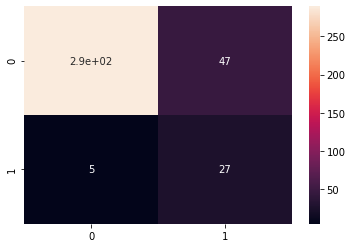

In [36]:
cm = confusion_matrix(LR_pred,y_test)
sns.heatmap(cm,annot=True)

In [37]:
print(classification_report(LR_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.86      0.92       336
           1       0.36      0.84      0.51        32

    accuracy                           0.86       368
   macro avg       0.67      0.85      0.71       368
weighted avg       0.93      0.86      0.88       368



### As seen I got a good recall score with Logistic but my precision score for those who will leave is not good.


# TASK #8: TRAIN AND EVALUATE A RANDOM FOREST CLASSIFIER

In [38]:
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier()

In [39]:
model_RF.fit(X_train,y_train)
RF_pred = model_RF.predict(X_test)
print('The accuracy score for Random Forest is: {}'.format(100*accuracy_score(RF_pred,y_test)))

The accuracy score for Random Forest is: 82.06521739130434


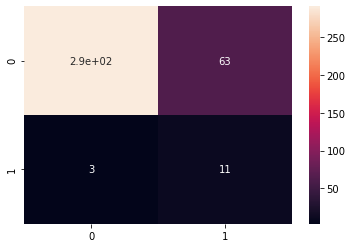

In [40]:
# Testing Set Performance
cm = confusion_matrix(RF_pred,y_test)
sns.heatmap(cm,annot=True)

In [41]:
print(classification_report(RF_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.82      0.90       354
           1       0.15      0.79      0.25        14

    accuracy                           0.82       368
   macro avg       0.57      0.80      0.57       368
weighted avg       0.96      0.82      0.87       368



### With Random Forest my precission score for employees who will leave is not so good.

# TASK #9: TRAIN AND EVALUATE A DEEP LEARNING MODEL 

In [42]:
import tensorflow as tf

In [43]:
model_NN = tf.keras.models.Sequential()
model_NN.add(tf.keras.layers.Dense(units=500, activation='relu', input_shape=(50, )))
model_NN.add(tf.keras.layers.Dense(units=500, activation='relu'))
model_NN.add(tf.keras.layers.Dense(units=500, activation='relu'))
model_NN.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [44]:
model_NN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               25500     
_________________________________________________________________
dense_1 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 501       
Total params: 527,001
Trainable params: 527,001
Non-trainable params: 0
_________________________________________________________________


In [45]:
model_NN.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [46]:
scaled_df = pd.DataFrame(scaled_data,columns=X_all.columns)
scaled_df.head()

,0,1,2,3,4,5,6,7,8,9,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.000000,0.000000,0.200,0.0,0.000000,0.15,0.222222,0.000000,0.294118
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.000000,0.333333,0.250,0.5,0.666667,0.25,0.388889,0.066667,0.411765
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.333333,0.000000,0.175,0.5,0.666667,0.00,0.000000,0.000000,0.000000
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.666667,0.000000,0.200,0.5,0.666667,0.20,0.388889,0.200000,0.000000
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.000000,0.333333,0.150,0.5,0.666667,0.05,0.111111,0.133333,0.117647


In [47]:
X_train_new,X_test_new,y_train_new,y_test_new = train_test_split(scaled_df,y,test_size = 0.25, random_state=43)

In [48]:
epochs_hist = model_NN.fit(X_train_new, y_train_new, epochs = 30, batch_size = 50)

Train on 1102 samples
Epoch 1/30
1102/1102 [==============================] - 1s 777us/sample - loss: 0.4082 - accuracy: 0.8503
Epoch 2/30
1102/1102 [==============================] - 0s 407us/sample - loss: 0.3351 - accuracy: 0.8639
Epoch 3/30
1102/1102 [==============================] - 0s 378us/sample - loss: 0.2939 - accuracy: 0.8947
Epoch 4/30
1102/1102 [==============================] - 0s 353us/sample - loss: 0.2676 - accuracy: 0.9047
Epoch 5/30
1102/1102 [==============================] - 0s 357us/sample - loss: 0.2394 - accuracy: 0.9156
Epoch 6/30
1102/1102 [==============================] - 0s 349us/sample - loss: 0.2210 - accuracy: 0.9183
Epoch 7/30
1102/1102 [==============================] - 0s 347us/sample - loss: 0.1918 - accuracy: 0.9265
Epoch 8/30
1102/1102 [==============================] - 0s 342us/sample - loss: 0.1784 - accuracy: 0.9456
Epoch 9/30
1102/1102 [==============================] - 0s 349us/sample - loss: 0.1457 - accuracy: 0.9501
Epoch 10/30
1102/1102 [=

In [49]:
y_pred = model_NN.predict(X_test)
y_pred = (y_pred > 0.5)

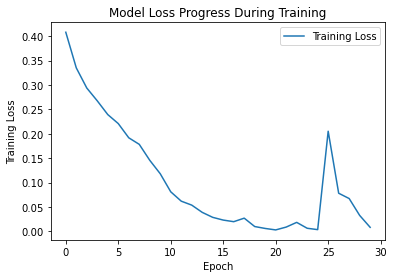

In [50]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

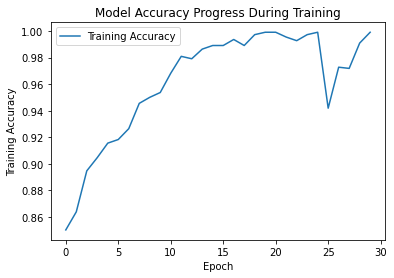

In [51]:
plt.plot(epochs_hist.history['accuracy'])
plt.title('Model Accuracy Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.legend(['Training Accuracy'])

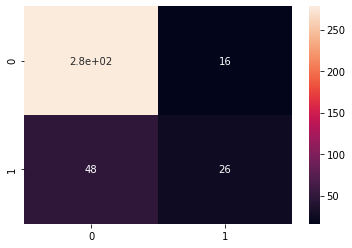

In [52]:
# Testing Set Performance
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)


In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       294
           1       0.62      0.35      0.45        74

    accuracy                           0.83       368
   macro avg       0.74      0.65      0.67       368
weighted avg       0.81      0.83      0.81       368



## Conclusion

#### In this notebook I did some EDA and visualized the data with the help of plt and sns. I used Logistic Regression, Random Forest & later built an ANN for predictions. Each of them had good accuracy. 
### But This is a mistake I see a lot of people doing.
#### Hence I want to address here. A good accuracy score is not enough to evaluate the performance of your model. It can actually mislead you sometimes. A real world model should have a good precision & recall score too. Hence its always a good practice to draw a confusion matrix and a classification report to get a better understanding of your model's performance. 
### So how can my models perform better?
#### Well there are a lot of things that can be done to make the models performe better. One more technique can be to handle the imbalance data. The target 'Attrition' was really imbalanced. The data can be balanced by using suppose SMOTE. 
#### One can use RandomisedSearchCV to find the best params of ML models. The ANN model can also be hyper tuned. There are a number of ways. 
## I would appreciate anyone to copy my notebook can make the predictions better and let me know the results. 

In [ ]:
#from imblearn.over_sampling import SMOTE
#oversampler = SMOTE(random_state=0)
#smote_train, smote_target = oversampler.fit_sample(X_train_new, y_train_new)
#epochs_hist = model_NN.fit(smote_train, smote_target, epochs = 10, batch_size = 50)